# CPSC 483-01 Project 2 Boston House Prices Due 3/11/2021
   ## Student Name: Fulya Kocaman
   ## Student ID: 803023878
   
 ## Project 2 Description:

In this project I used NumPy to implement vectorized linear and polynomial regression models and compare their performance using separate training and test sets of the Boston house-price data. In the training dataset we have 13 variables (from CRIM to LSTAT) and in the test dataset we have a variable called MEDV which is the median value of a home in $1000s. 

I implemented all of the required parts of this project and answered all of the experiment questions in the markdown cells of my code below. As a conclusion, I can say that my code seems to be working fine and predicting accurate results to the given experiment questions. 

In [57]:
import numpy as np
import matplotlib.pyplot as plt

## Experiment 1: 
Load the the dataset

In [58]:
with np.load('boston.npz') as data:
    features = data['features']
    target = data['target']

In [59]:
features.size

6578

In [60]:
target.size

506

In [61]:
features.shape

(506, 13)

In [62]:
target.shape

(506,)

## Experiment 2: 
Set aside the first 102 items (20% of the total) as a validation set, and the remaining 404 items for training.

In [63]:
validation = features[0:102]
training = features[102:]

In [64]:
validation.size

1326

In [65]:
training.size

5252

In [66]:
rooms = training[:,5]

In [67]:
rooms

array([5.96 , 6.678, 6.416, 5.412, 6.333, 5.965, 5.856, 6.951, 5.885,
       5.782, 6.151, 6.816, 5.787, 5.593, 6.122, 5.019, 6.315, 5.012,
       5.705, 5.905, 6.549, 7.041, 6.209, 8.398, 6.29 , 6.852, 8.704,
       5.87 , 8.247, 5.731, 5.605, 7.249, 6.437, 6.593, 5.803, 6.458,
       6.114, 7.333, 6.438, 5.706, 5.036, 5.836, 7.454, 5.92 , 6.009,
       6.431, 5.608, 6.245, 6.317, 6.487, 5.404, 6.474, 5.927, 6.98 ,
       5.682, 5.759, 6.393, 5.456, 6.421, 6.004, 6.319, 6.415, 7.185,
       6.193, 3.863, 5.928, 6.556, 6.511, 6.172, 5.344, 6.229, 5.617,
       5.961, 6.174, 6.417, 6.411, 5.747, 5.884, 6.431, 7.178, 6.341,
       6.75 , 6.229, 8.266, 6.115, 5.304, 6.127, 6.195, 6.619, 6.348,
       6.185, 6.38 , 4.138, 4.368, 6.167, 7.645, 6.897, 5.39 , 5.898,
       5.454, 6.655, 5.272, 6.625, 6.242, 4.963, 5.986, 4.973, 6.004,
       6.014, 5.976, 6.426, 8.069, 6.208, 5.572, 6.728, 7.691, 5.888,
       6.169, 6.254, 6.335, 5.708, 6.297, 6.484, 6.009, 6.072, 6.345,
       5.857, 5.879,

In [68]:
trainingTest = target[102:]

In [69]:
trainingTest.size

404

## Experiment 3: 
Create a scatterplot of the training data showing the relationship between the number of rooms and the median value of a home. 

Text(0.5, 1.0, 'MEDV vs RM')

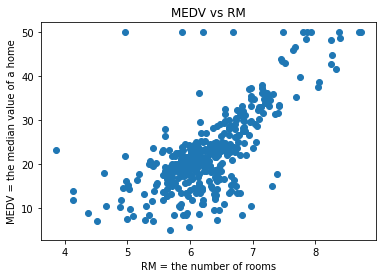

In [70]:
plt.scatter(rooms, trainingTest)
plt.xlabel('RM = the number of rooms')
plt.ylabel('MEDV = the median value of a home' )
plt.title('MEDV vs RM')

## The result of Experiment 3: 
The relationship between the number of rooms and the median value of a home appear to be linear.

## Experiment 4: 
With RM as X and MEDV as t, compute w for the training set. 

In [116]:
x = training[:,5][:,None] # turns rooms into a vector
x

array([[5.96 ],
       [6.678],
       [6.416],
       [5.412],
       [6.333],
       [5.965],
       [5.856],
       [6.951],
       [5.885],
       [5.782],
       [6.151],
       [6.816],
       [5.787],
       [5.593],
       [6.122],
       [5.019],
       [6.315],
       [5.012],
       [5.705],
       [5.905],
       [6.549],
       [7.041],
       [6.209],
       [8.398],
       [6.29 ],
       [6.852],
       [8.704],
       [5.87 ],
       [8.247],
       [5.731],
       [5.605],
       [7.249],
       [6.437],
       [6.593],
       [5.803],
       [6.458],
       [6.114],
       [7.333],
       [6.438],
       [5.706],
       [5.036],
       [5.836],
       [7.454],
       [5.92 ],
       [6.009],
       [6.431],
       [5.608],
       [6.245],
       [6.317],
       [6.487],
       [5.404],
       [6.474],
       [5.927],
       [6.98 ],
       [5.682],
       [5.759],
       [6.393],
       [5.456],
       [6.421],
       [6.004],
       [6.319],
       [6.415],
       [

In [117]:
X = np.hstack((np.ones_like(x),x)) # turns rooms into a matrix by augmenting each value with a 1
X

array([[1.   , 5.96 ],
       [1.   , 6.678],
       [1.   , 6.416],
       [1.   , 5.412],
       [1.   , 6.333],
       [1.   , 5.965],
       [1.   , 5.856],
       [1.   , 6.951],
       [1.   , 5.885],
       [1.   , 5.782],
       [1.   , 6.151],
       [1.   , 6.816],
       [1.   , 5.787],
       [1.   , 5.593],
       [1.   , 6.122],
       [1.   , 5.019],
       [1.   , 6.315],
       [1.   , 5.012],
       [1.   , 5.705],
       [1.   , 5.905],
       [1.   , 6.549],
       [1.   , 7.041],
       [1.   , 6.209],
       [1.   , 8.398],
       [1.   , 6.29 ],
       [1.   , 6.852],
       [1.   , 8.704],
       [1.   , 5.87 ],
       [1.   , 8.247],
       [1.   , 5.731],
       [1.   , 5.605],
       [1.   , 7.249],
       [1.   , 6.437],
       [1.   , 6.593],
       [1.   , 5.803],
       [1.   , 6.458],
       [1.   , 6.114],
       [1.   , 7.333],
       [1.   , 6.438],
       [1.   , 5.706],
       [1.   , 5.036],
       [1.   , 5.836],
       [1.   , 7.454],
       [1. 

In [110]:
t = target[102:] # turns target into a vector
t.size

404

In [111]:
XX = np.dot(X.T,X)

In [112]:
invXX = np.linalg.inv(XX)

In [113]:
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)

In [114]:
print(w)

[-34.12731481   9.03591206]


## The result of Experiment 4: 
The equation for MEDV as a linear function of RM: f(x;w0,w1) = -34.127 + 9.036x

## Experiment 5: 
Use w to add a line representing the least squares fit to your scatter plot from experiment (3)

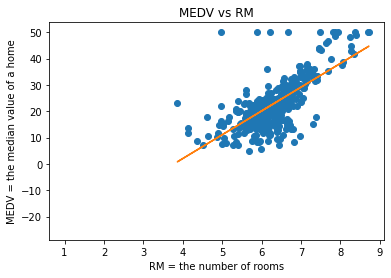

In [115]:
plt.scatter(rooms, trainingTest)
plt.xlabel('RM = the number of rooms')
plt.ylabel('MEDV = the median value of a home' )
plt.title('MEDV vs RM')
plt.plot(X, w[0] + w[1]*X) # The line represents the least squares fit  

In [79]:
testx = np.linspace(3.5,15,1)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w)

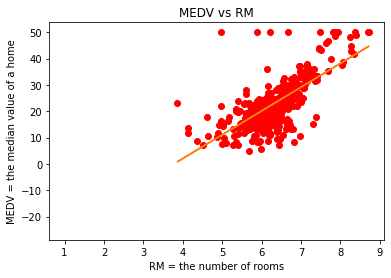

In [80]:
plt.figure()
plt.xlabel('RM = the number of rooms')
plt.ylabel('MEDV = the median value of a home' )
plt.title('MEDV vs RM')
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')
plt.plot(X, w[0] + w[1]*X) # The line represents the least squares fit  

## The result of Experiment 5:
The model appears to fit well for the training set.

## Experiment 6: 
Use w to find the predicted response for each value of the RM attribute in the training set, then compute the average loss 𝓛 for the model.

In [81]:
predictedResponse = np.array([])

for num in rooms:
    value =  w[0] + w[1]*num
    predictedResponse = np.append(predictedResponse,value)

In [82]:
predictedResponse.size

404

In [83]:
trainingTest.size

404

In [84]:
lossTraining = np.array([])
totalLoss = 0
index = 0

for num in predictedResponse:
    value = (num - trainingTest[index])**2
    lossTraining = np.append(lossTraining,value)
    index += 1

In [85]:
lossTraining.mean()

41.05654883138218

## The result of Experiment 6: 
The averale loss of the training model with RM attribute is 41.0565.

## Experiment 7:
Repeat experiment (6) for the validation set. How do the training and validation MSE values compare? What accounts for the difference?

In [86]:
roomsValidation = validation[:,5]
x = validation[:,5][:,None] # turns validation of rooms into a vector

In [87]:
X = np.hstack((np.ones_like(x),x)) # turns validation of rooms into a matrix by augmenting each value with a 1

In [88]:
t = target[:102][:,None] # turns target into a vector

In [89]:
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print(w)

[[-36.91728777]
 [  9.37744447]]


In [90]:
predictedResponse = np.array([])

for num in roomsValidation:
    value =  w[0] + w[1]*num
    predictedResponse = np.append(predictedResponse,value)

In [91]:
predictedResponse.size

102

In [92]:
validationTest = target[:102]

lossValidation = np.array([])
totalLoss = 0
index = 0

for num in predictedResponse:
    value = (num - validationTest[index])**2
    lossValidation = np.append(lossValidation,value)
    index += 1

In [93]:
lossValidation.mean()

53.30625794995984

## The result of Experiment 7:
The average loss of the validation model with RM attribute is 53.3063. The training and validation MSE values for the RM attribute are different. The MSE for the validation is higher than the tarinig set. The loss that is calculated from validation data will be sensitive to the choice of data in the validation set sice the validation set is small.

## Experiment 8:
Repeat experiments (4), (6), and (7) using all 13 input features as X. How do the training and validation MSEs for this model compare to the values you found for experiment (7). What accounts for the difference?

In [94]:
x = training[:] # turns training into a matrix
X = np.insert(x, 0, 1, axis=1) # instead of using ones_like used insert 1 to each row
t = target[102:] # turns target into a vector
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print(w)

[ 3.19642409e+01 -1.14552861e-01  4.48932130e-02  2.83755698e-02
  2.70909742e+00 -1.67403672e+01  4.11148209e+00 -8.47905081e-04
 -1.38493905e+00  3.21084569e-01 -1.22497115e-02 -9.12523500e-01
  1.02533638e-02 -4.78414631e-01]


Now, we need to find the predicted response for each value using all 13 input features  $t_{n}$ = $w_{0}$$x_{n0}$ +$w_{1}$$x_{n1}$ + $w_{2}$$x_{n2}$ + $w_{2}$$x_{n2}$ + ... + $w_{13}$$x_{n13}$ which can also be calculated using matrix multiplication (dot product). We are able to use the dot product as X.w because the number of columns in the matrix X is equal to the number of rows in the the vector w which is 14.    

In [95]:
w.size

14

In [96]:
X.shape


(404, 14)

In [97]:
Xw = np.dot(X,w) # predicted response vector for the training dataset

In [98]:
lossTraining = np.array([])
totalLoss = 0
index = 0

for num in Xw:
    value = (num - trainingTest[index])**2
    lossTraining = np.append(lossTraining,value)
    index += 1

In [99]:
lossTraining.mean()

21.807199582316603

In [100]:
Xw.size

404

In [101]:
x = validation[:]
X = np.insert(x, 0, 1, axis=1) # insert 1 to each row instead of using ones_like 
t = target[:102]
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print(w)

[ 5.12811287e+01 -9.49848182e-02  4.76305111e-02 -3.63407030e-02
  3.42317937e+00 -1.96487888e+01  2.81393877e+00  7.15969218e-03
 -1.83114511e+00  2.50183749e-01 -1.21228727e-02 -1.15160786e+00
  7.73583791e-03 -6.62959844e-01]


In [102]:
w.size

14

In [103]:
X.shape

(102, 14)

In [104]:
Xw = np.dot(X,w) # predicted response vector for the validation dataset

In [105]:
lossTraining = np.array([])
totalLoss = 0
index = 0

for num in Xw:
    value = (num - trainingTest[index])**2
    lossTraining = np.append(lossTraining,value)
    index += 1

In [106]:
validationTest = target[:102]
lossValidation = np.array([])
totalLoss = 0
index = 0

for num in Xw:
    value = (num - validationTest[index])**2
    lossValidation = np.append(lossValidation,value)
    index += 1

In [107]:
lossValidation.mean()

20.214148879815482

## The result of Experiment 8:
The average loss of the training and the validation models with all 13 input features are 21.8072 and 20.2141 respectively. Both the training and validation MSEs for this model are smaller compared to the values found for experiment (7). When more features added to the model, the result of this experiment shows that the model can predict better. In our case we have used all 13 features in this model, so this made the model predict better by having a smaller loss (MSE) compared to using only one feature as in experiment (7).

## Experiment 9:
Based on the value for w for the new model, how much does a one unit increase in each feature change the median value of the home? Based on the description of the dataset provided by StatLib, convert your answer to dollars.

## The result of Experiment 9:
### CRIM     per capita crime rate by town
In one unit increase in CRIM, we would expect to see the median value of the home decrease by $114.55

### ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
In one unit increase in ZN, we would expect to see the median value of the home decrease by $48.93

###  INDUS    proportion of non-retail business acres per town
In one unit increase in INDUS, we would expect to see the median value of the home increase by $28.38

###  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
In one unit increase in CHAS, we would expect to see the median value of the home increase by $2,709.10

###  NOX      nitric oxides concentration (parts per 10 million)
In one unit increase in NOX, we would expect to see the median value of the home decrease by $16,740.37

###  RM       average number of rooms per dwelling
In one unit increase in RM, we would expect to see the median value of the home increase by $4,111.48

###  AGE      proportion of owner-occupied units built prior to 1940
In one unit increase in AGE, we would expect to see the median value of the home decrease by $0.85

###  DIS      weighted distances to five Boston employment centres
In one unit increase in DIS, we would expect to see the median value of the home decrease by $1,384.94

###  RAD      index of accessibility to radial highways
In one unit increase in RAD, we would expect to see the median value of the home increase by $321.08

###  TAX      full-value property-tax rate per 10,000
In one unit increase in TAX, we would expect to see the median value of the home decrease by $12.25

### PTRATIO  pupil-teacher ratio by town
In one unit increase in PTRATIO, we would expect to see the median value of the home decrease by $912.52

###  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
In one unit increase in B, we would expect to see the median value of the home increase by $10.25

###  LSTAT    % lower status of the population
In one unit increase in AGE, we would expect to see the median value of the home decrease by $47.84

## Experiment 10:
Based on the amount of change in the value of a home, which features are most important?

## The result of Experiment 10:
The features that are most important based on the amount of change in the value of a home are NOX, RM, CHAS, DIS, and PTRATIO.
